In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Inspection Data

-  ### Import and Read Data

In [2]:
# Import and read dataset and stored in a variable called "df"
# Read the csv file using 'read_csv'

df = pd.read_csv("./loan.csv", low_memory=False)

-   ### Inspect Dataframe

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Checking the number of rows and columns in the dataframe

df.shape

(39717, 111)

In [5]:
# Checking the column-wise info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# Checking the datatype of every column

df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Cleaning the Data

In [7]:
# Getting the column-wise Null count using 'is.null()' alongwith the 'sum()' function

df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# Getting the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and 
# rounding it off to two decimal places

round(100*(df.isnull().sum()/df.shape[0]), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [9]:
# Dropping the columns having null values >=90% using '.drop()'

df.drop(df.loc[:,(round(100*(df.isnull().sum()/df.shape[0]), 2)>=90)], inplace=True, axis=1)

In [10]:
df.shape

(39717, 55)

In [11]:
round(100*(df.isnull().sum()/df.shape[0]), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Inspecting two columns 'desc' and 'mths_since_last_delinq'

In [12]:
df.loc[:,['desc','mths_since_last_delinq']]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


- ##### 'desc' column is a description column which is a text document which we cannot use.
- ##### 'mths_since_last_delinq' column represents the number months passed since the person last fell into the 90 DPD(Days Past Due) group. We shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval.

In [13]:
# Dropping two columns 'desc' and 'mths_since_last_delinq' using '.drop()'

df.drop(['desc','mths_since_last_delinq'], inplace=True, axis=1)

In [14]:
# Getting the row-wise Null count the same way. This time just specify the axis as 1

df.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [15]:
# Checking whether some rows are having more than 5 null values

len(df.loc[df.isnull().sum(axis=1)>5,:])

0

### Data is cleaned. Most of the null values are removed from the dataframe. 
### Now, let's check whether the columns are in correct fromat or not.

In [16]:
# Inspecting the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
# Inspecting the column 'int_rate'

df['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [18]:
# Changing the datatype of 'int_rate' column to '.to_numeric' after splitting it on '%'

df['int_rate'] = df.int_rate.apply(lambda x: pd.to_numeric(x.split('%')[0]))
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [19]:
# Inspecting the column 'emp_length'

df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [20]:
# Dropping the null values from the column
df = df[~df['emp_length'].isnull()]

# Extracting the numeric values from every rows
df['emp_length'] = df.emp_length.str.extract('(\d+)')

# Changing the column datatype from 'object' to 'int'
df['emp_length'].astype(int)

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: int32

In [21]:
# Changing the datatype of column 'issue_d' from 'object' to 'datetime'

from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# Data Analysis

### The objective is to identify predictors of default so that at the time of loan application, we can use those   variables for approval/rejection of the loan. Now, there are broadly three types of variables.
- #### Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
- #### Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
- #### Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).


In [22]:
# Select the behaviour variables from the dataframe and store them in the variable 'behaviour_variables'

behaviour_variables = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc', 'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','initial_list_status']
behaviour_variables 

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type',
 'initial_list_status']

- #### Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

- #### Thus, going forward, you will use only the other two types of variables.


In [23]:
# Drop the 'behaviour_variables' using '.drop()'

df.drop(behaviour_variables, inplace=True, axis=1)

- #### Also, we will not be able to use the variables zip_code, addr_state, url.

In [24]:
# Drop the columns 'zip_code', 'addr_state', and 'url' using '.drop()'

df.drop(['zip_code','addr_state','url'], inplace=True, axis=1)

- #### The variable 'title' is derived from the variable 'purpose' thus get rid of all these variables as well.

In [25]:
# Drop the column 'title' using '.drop()'

df.drop(['title'], inplace=True, axis=1)

- #### Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise. Get rid of the rows whose loan status is ‘Current’ because they are neither 'fully paid' not 'defaulted'.

In [26]:
# Delete rows whose 'loan_status' is 'Current'
df = df.loc[df['loan_status'] != 'Current',:]

# Change value of 'loan_status' to 0 where 'loan_status' == 'Fully Paid'
df.loc[df['loan_status'] == 'Fully Paid', 'loan_status'] = 0

# Change value of 'loan_status' to 1 where 'loan_status' == 'Charged Off'
df.loc[df['loan_status'] == 'Charged Off', 'loan_status'] = 1

# Change the datatype of 'loan_status' from 'object' to 'int'
df['loan_status'] = df['loan_status'].astype(int)

In [27]:
# Inspecting the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          37544 non-null  int64         
 1   member_id                   37544 non-null  int64         
 2   loan_amnt                   37544 non-null  int64         
 3   funded_amnt                 37544 non-null  int64         
 4   funded_amnt_inv             37544 non-null  float64       
 5   term                        37544 non-null  object        
 6   int_rate                    37544 non-null  float64       
 7   installment                 37544 non-null  float64       
 8   grade                       37544 non-null  object        
 9   sub_grade                   37544 non-null  object        
 10  emp_title                   36136 non-null  object        
 11  emp_length                  37544 non-null  object    

## Univariate Analysis

In [28]:
# Calculate overall 'Default' percentage

round(df['loan_status'].mean() * 100, 2)

14.38

#### The average default rate is 14.38%

#### Let's analyse the 'Default Rate' across different category columns
- #### First analyse the Discrete Variables 

In [29]:
# Let's define a function which take a categorical column as input and return plot of 'loan status' across the column

def plot_status(cat_col):
    return sns.barplot(data=df, x=cat_col, y='loan_status')

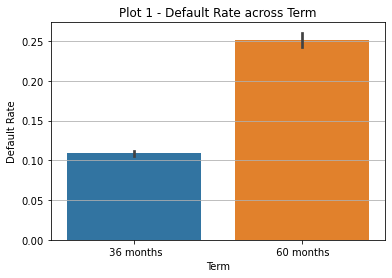

In [30]:
# Plot 1 - Shows Default Rate across different 'Term'

plot_status('term')
plt.title('Plot 1 - Default Rate across Term')
plt.xlabel('Term')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Defalut Rate is Maximun in '60 Months' Term

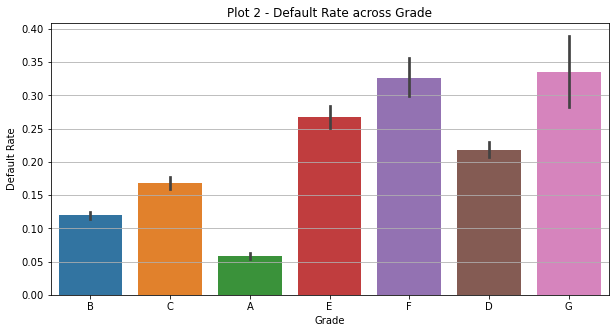

In [31]:
# Plot 2 - Shows Default Rate across different 'Grade'

plt.figure(figsize=(10,5))
plot_status('grade')
plt.title('Plot 2 - Default Rate across Grade')
plt.xlabel('Grade')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Default Rate is Maximum in 'G' and 'F' Grade

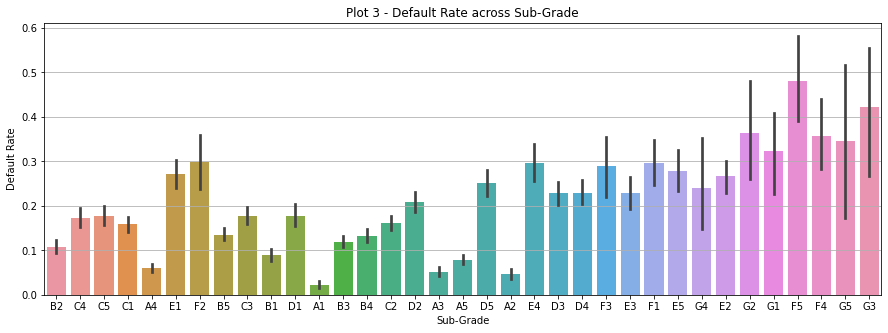

In [32]:
# Plot 3 - Shows Default Rate across different 'Sub-Grade'

plt.figure(figsize=(15,5))
plot_status('sub_grade')
plt.title('Plot 3 - Default Rate across Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Default Rate is Maximum in 'Grade G - G3, G2' and 'F - F5, F2'

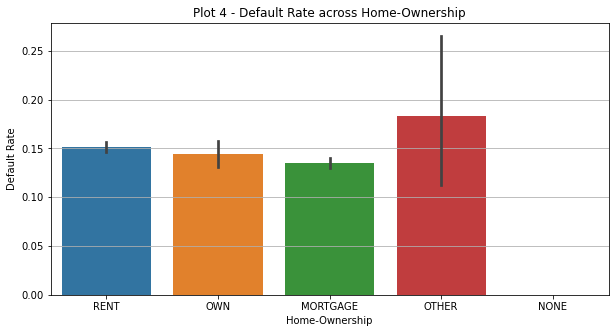

In [33]:
# Plot 4 - Shows Default Rate across different 'Home-Ownership'

plt.figure(figsize=(10,5))
plot_status('home_ownership')
plt.title('Plot 4 - Default Rate across Home-Ownership')
plt.xlabel('Home-Ownership')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Default Rate is Maximum in 'Other' Home-Ownership

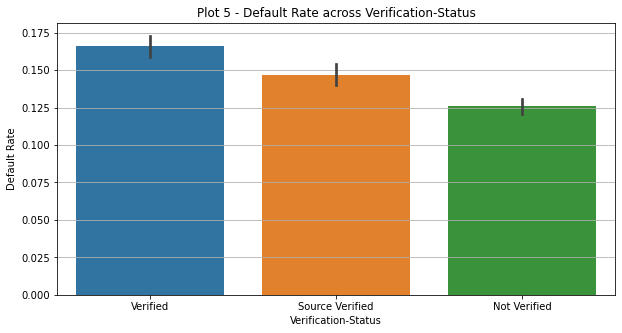

In [34]:
# Plot 5 - Shows Default Rate across different 'Verification-Status'

plt.figure(figsize=(10,5))
plot_status('verification_status')
plt.title('Plot 5 - Default Rate across Verification-Status')
plt.xlabel('Verification-Status')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Default Rate is Maximum in 'Verified' Verification-Status

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

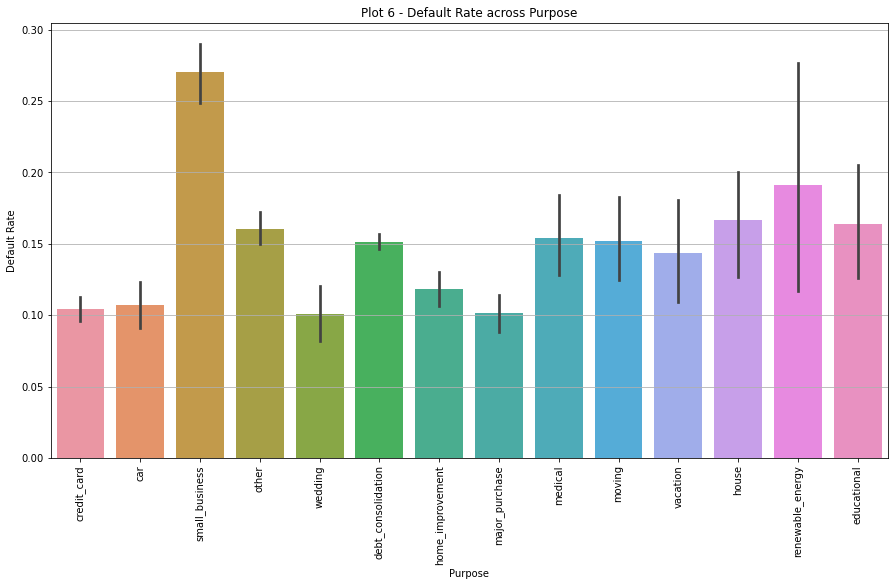

In [35]:
# Plot 6 - Shows Default Rate across different 'Purpose'

plt.figure(figsize=(15,8))
plot_status('purpose')
plt.title('Plot 6 - Default Rate across Purpose')
plt.xlabel('Purpose')
plt.ylabel('Default Rate')
plt.grid(axis='y')
plt.xticks(rotation=90)

#### Default Rate is Maximum in 'Small Business'

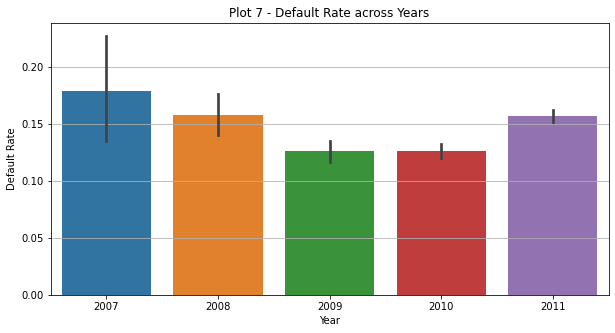

In [36]:
# Plot 7 - Shows Default Rate across different 'Years'

plt.figure(figsize=(10,5))
plot_status(df['issue_d'].dt.year)
plt.title('Plot 7 - Default Rate across Years')
plt.xlabel('Year')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Default Rate is Maximum in '2007' Year

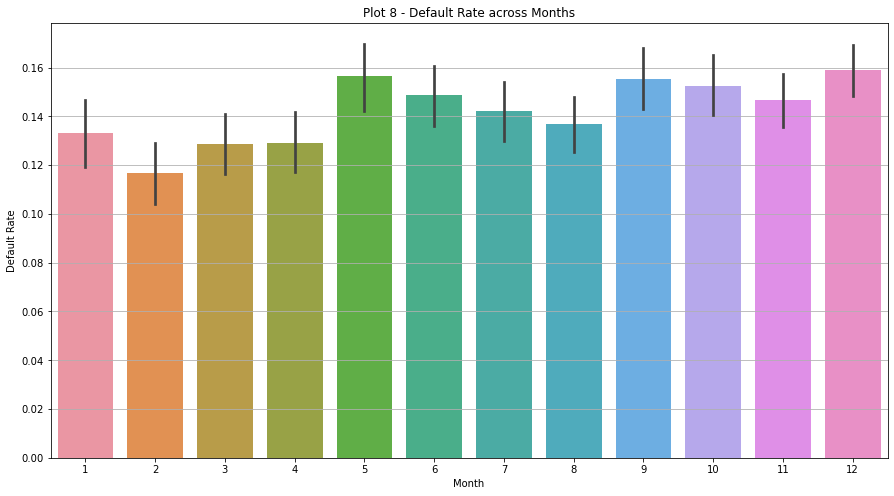

In [37]:
# Plot 8 - Shows Default Rate across different 'Months'

plt.figure(figsize=(15,8))
plot_status(df['issue_d'].dt.month)
plt.title('Plot 8 - Default Rate across Months')
plt.xlabel('Month')
plt.ylabel('Default Rate')
plt.grid(axis='y')

### Now, let's analyse the Countinious Valriables

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


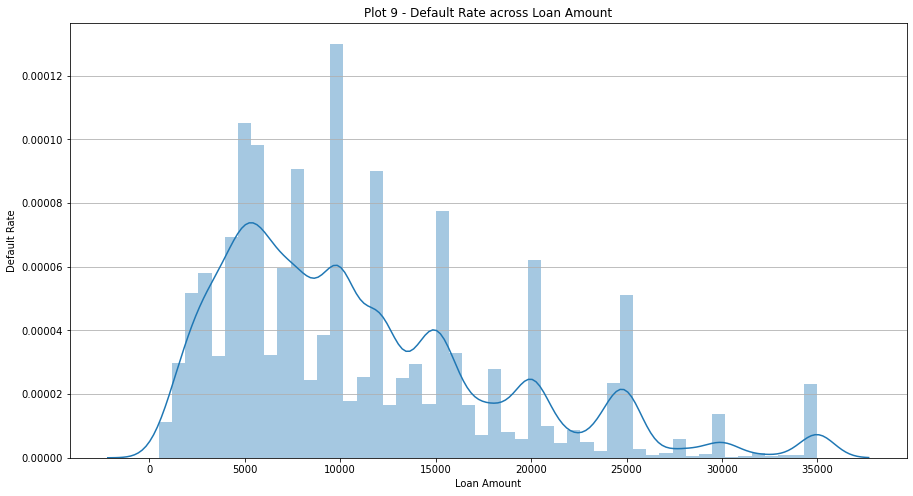

In [38]:
# Plot 9 - Shows Default Rate across 'Loan Amount'

plt.figure(figsize=(15,8))
sns.distplot(df['loan_amnt'])
plt.title('Plot 9 - Default Rate across Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Default Rate')
plt.grid(axis='y')

### Lets convert these Continous Variables to Descrete Bins for better Visualization of data

In [39]:
# Define a function which categorise the 'loan_amnt' in 'Low', 'Medium', 'High', 'Very High'

def loan_cat(n):
    if n < 5000:
        return 'Low'
    elif n >=5000 and n < 15000:
        return 'Medium'
    elif n >= 15000 and n < 25000:
        return 'High'
    else:
        return 'Very High'
    
# Define Category of 'loan_amnt' using different range using function 'loan_cat'        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_cat(x))

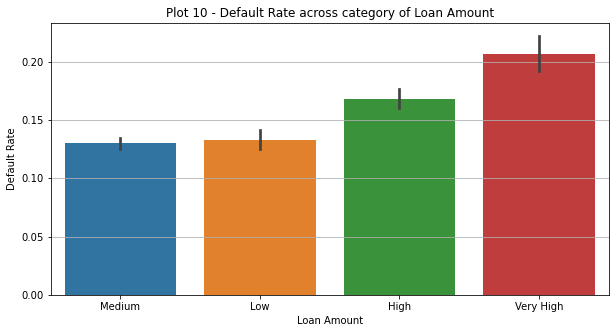

In [40]:
# Plot 10 - Show the Default Rate acoss different category of 'Loan Amount'

plt.figure(figsize=(10,5))
plot_status('loan_amnt')
plt.title('Plot 10 - Default Rate across category of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Higher the Loan Amount - Higher the Default Rate

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


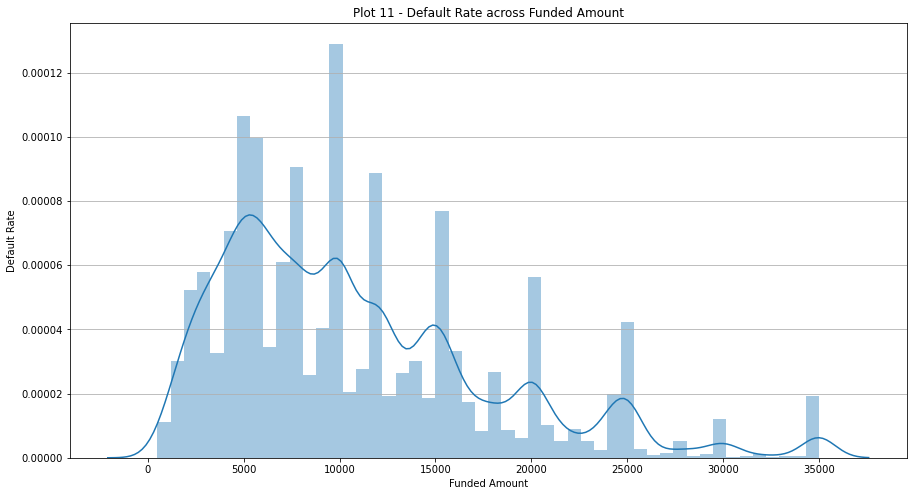

In [41]:
# Plot 11 - Shows Default Rate across 'Funded Amount'

plt.figure(figsize=(15,8))
sns.distplot(df['funded_amnt'])
plt.title('Plot 11 - Default Rate across Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Default Rate')
plt.grid(axis='y')

In [42]:
# Define Category of 'funded_amnt' using different range using function 'loan_cat'

df['funded_amnt'] = df['funded_amnt'].apply(lambda x: loan_cat(x))

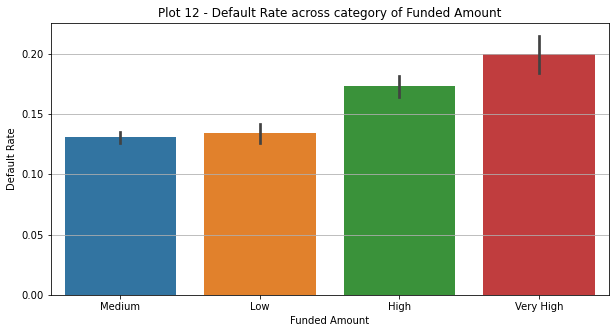

In [43]:
# Plot 12 - Show the Default Rate acoss different category of 'Funded Amount'

plt.figure(figsize=(10,5))
plot_status('funded_amnt')
plt.title('Plot 12 - Default Rate across category of Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Default Rate is Maximun in Very High Funded Amount

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


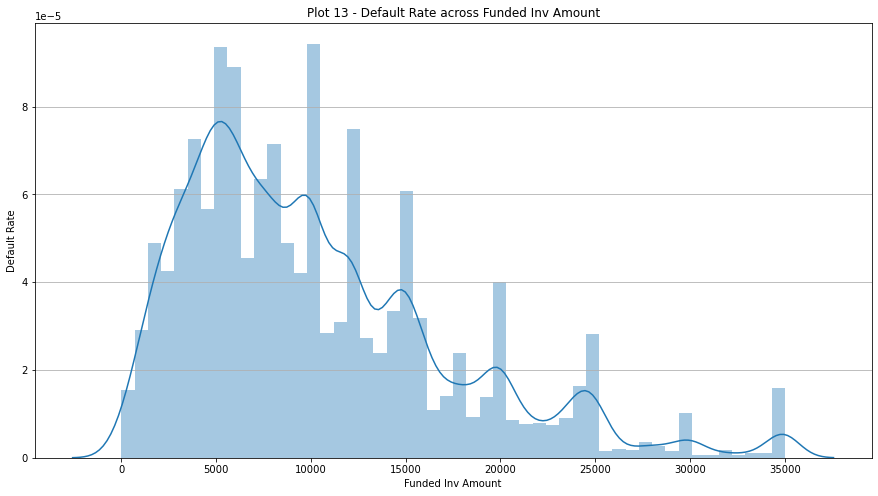

In [44]:
# Plot 13 - Shows Default Rate across 'Funded Inv Amount'

plt.figure(figsize=(15,8))
sns.distplot(df['funded_amnt_inv'])
plt.title('Plot 13 - Default Rate across Funded Inv Amount')
plt.xlabel('Funded Inv Amount')
plt.ylabel('Default Rate')
plt.grid(axis='y')

In [45]:
# Define Category of 'Funded Inv Amount' using different range using function 'loan_cat'
        
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_cat(x))

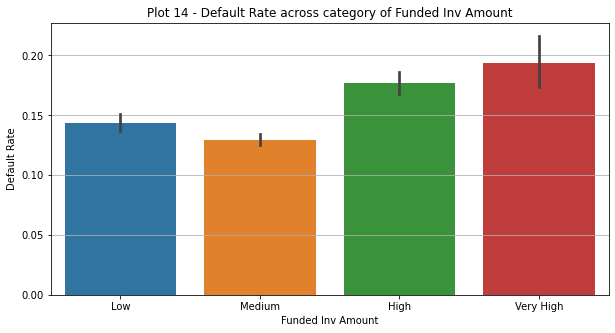

In [46]:
# Plot 14 - Show the Default Rate acoss different category of 'Funded Inv Amount'

plt.figure(figsize=(10,5))
plot_status('funded_amnt_inv')
plt.title('Plot 14 - Default Rate across category of Funded Inv Amount')
plt.xlabel('Funded Inv Amount')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Default Rate is Maximum in Very High Funded Inv Amount

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


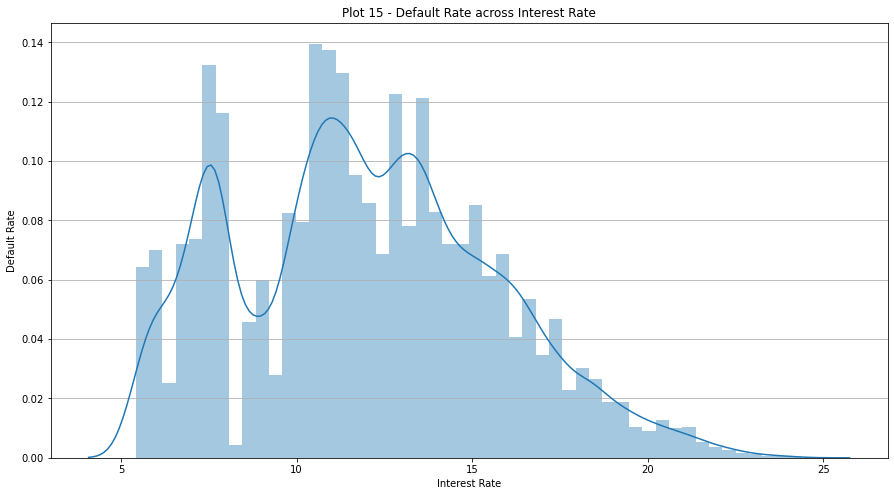

In [47]:
# Plot 15 - Shows Default Rate across 'Interest Rate'

plt.figure(figsize=(15,8))
sns.distplot(df['int_rate'])
plt.title('Plot 15 - Default Rate across Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate')
plt.grid(axis='y')

In [48]:
# Define a function which categorise the 'Interest Rate' in 'Low', 'Medium', 'High', 'Very High'

def int_cat(x):
    if x<7.0 :
        return 'Low'
    elif x>=7.0 and x<14.0 :
        return 'Medium'
    elif x>=14.0 and x<20.0 :
        return 'High'
    else:
        return 'Very High'
    
# Define Category of 'int_rate' using different range using function 'int_cat'
df['int_rate'] = df['int_rate'].apply(lambda x: int_cat(x))

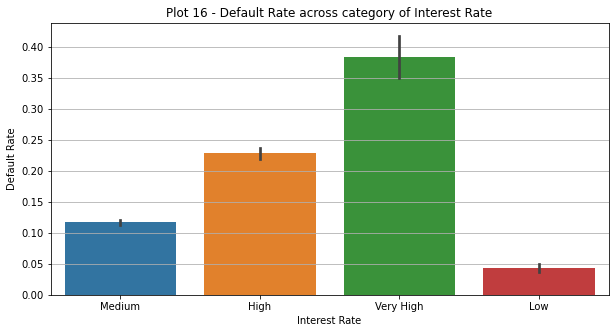

In [49]:
# Plot 16 - Show the Default Rate acoss different category of 'Interest Rate'

plt.figure(figsize=(10,5))
plot_status('int_rate')
plt.title('Plot 16 - Default Rate across category of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Higher the Interest Rate - Higher the Default Rate

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


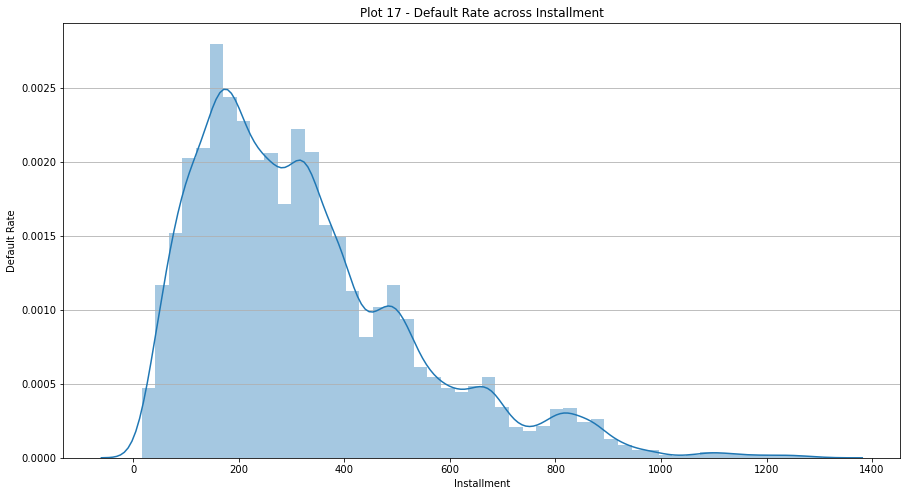

In [50]:
# Plot 17 - Shows Default Rate across 'Installment'

plt.figure(figsize=(15,8))
sns.distplot(df['installment'])
plt.title('Plot 17 - Default Rate across Installment')
plt.xlabel('Installment')
plt.ylabel('Default Rate')
plt.grid(axis='y')

In [51]:
# Define a function which categorise the 'Installment' in 'Low', 'Medium', 'High', 'Very High'

def inst_cat(x):
    if x<200 :
        return 'Low'
    elif x>=200 and x<500 :
        return 'Medium'
    elif x>=500 and x<800 :
        return 'High'
    else:
        return 'Very High'
    
# Define Category of 'installment' using different range using function 'inst_cat'
df['installment'] = df['installment'].apply(lambda x: inst_cat(x))

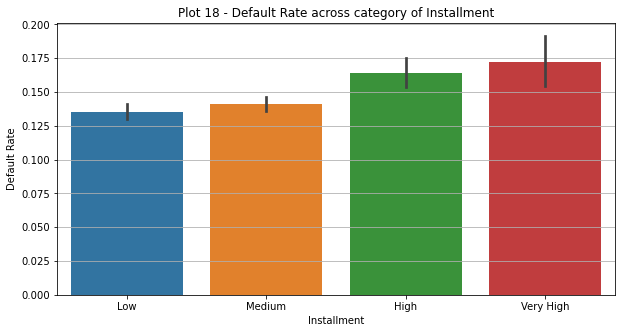

In [52]:
# Plot 18 - Show the Default Rate acoss different category of 'Installment'

plt.figure(figsize=(10,5))
plot_status('installment')
plt.title('Plot 18 - Default Rate across category of Installment')
plt.xlabel('Installment')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Higher the Installment - Higher the Default Rate

In [53]:
# Define a function which categorise the 'Annual Income' in 'Low', 'Medium', 'High', 'Very High'

def annual_cat(x):
    if x<50000 :
        return 'Low'
    elif x>=50000 and x<100000 :
        return 'Medium'
    elif x>=100000 and x<150000 :
        return 'High'
    else:
        return 'Very High'
    
# Define Category of 'annual_inc' using different range using function 'annual_cat'
df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_cat(x))

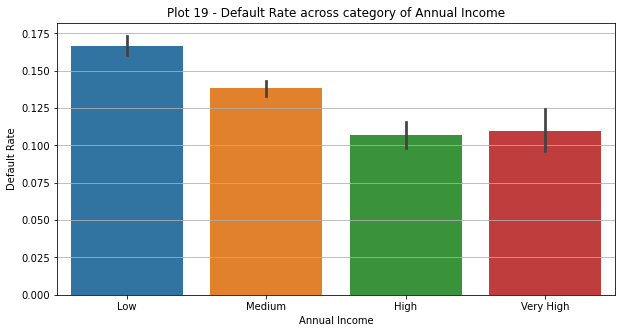

In [54]:
# Plot 19 - Show the Default Rate acoss different category of 'Annual Income'

plt.figure(figsize=(10,5))
plot_status('annual_inc')
plt.title('Plot 19 - Default Rate across category of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Lower the Annual Income - Higher the Default Rate

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


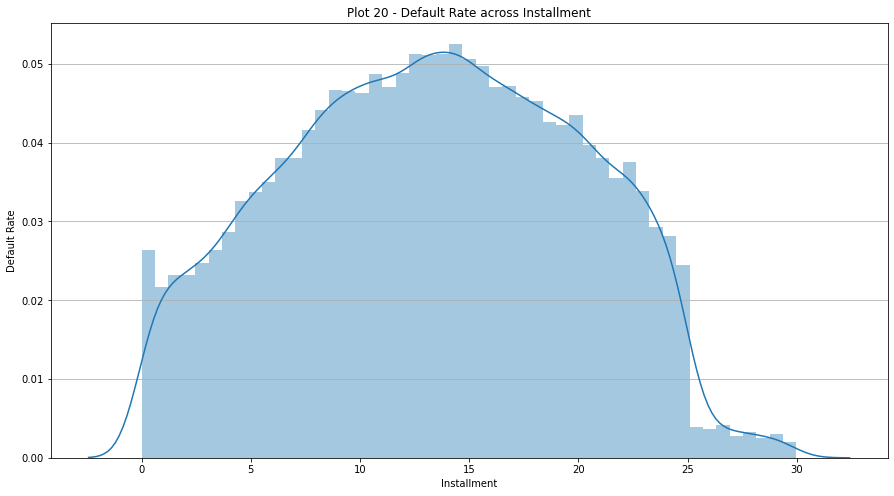

In [55]:
# Plot 20 - Shows Default Rate across 'DTI' (Debt to Income Ratio)

plt.figure(figsize=(15,8))
sns.distplot(df['dti'])
plt.title('Plot 20 - Default Rate across Installment')
plt.xlabel('Installment')
plt.ylabel('Default Rate')
plt.grid(axis='y')

In [56]:
# Define a function which categorise the 'DTI' (Debt to Income Ratio) in 'Low', 'Medium', 'High', 'Very High'

def dti_cat(x):
    if x<7 :
        return 'Low'
    elif x>=7 and x<14 :
        return 'Medium'
    elif x>=14 and x<20 :
        return 'High'
    else:
        return 'Very High'
    
# Define Category of 'dti' using different range using function 'dti_cat'
df['dti'] = df['dti'].apply(lambda x: dti_cat(x))

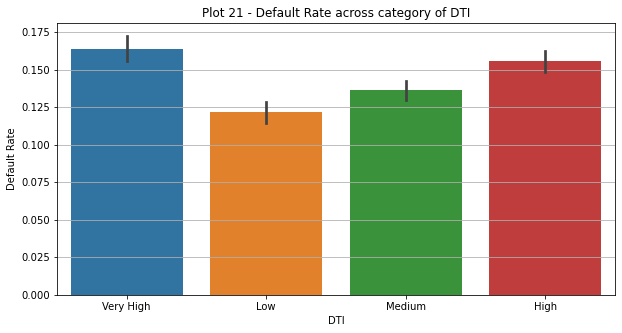

In [57]:
# Plot 21 - Show the Default Rate acoss different category of 'DTI' (Debt to Income Ratio)

plt.figure(figsize=(10,5))
plot_status('dti')
plt.title('Plot 21 - Default Rate across category of DTI')
plt.xlabel('DTI')
plt.ylabel('Default Rate')
plt.grid(axis='y')

#### Higher the DTI (Debt to Income Ratio) - Higher the Default Rate

## Segmented Univariate Analysis

- ### One of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.
- ### This comes from business understanding, though ,again have a look at the default rates across the purpose of the loan.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

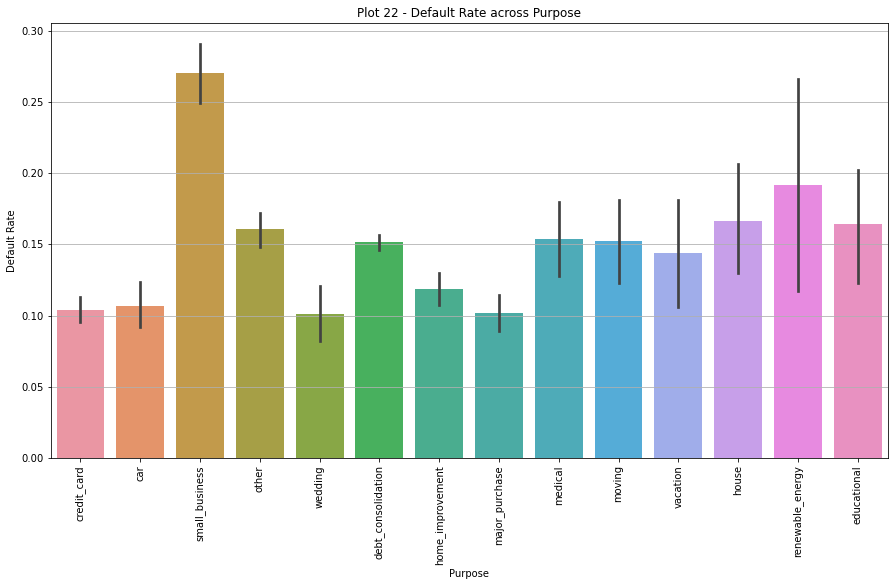

In [58]:
# Plot 22 - Shows Default Rate across defferent 'Purpose'

plt.figure(figsize=(15,8))
plot_status('purpose')
plt.title('Plot 22 - Default Rate across Purpose')
plt.xlabel('Purpose')
plt.ylabel('Default Rate')
plt.grid(axis='y')
plt.xticks(rotation=90)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

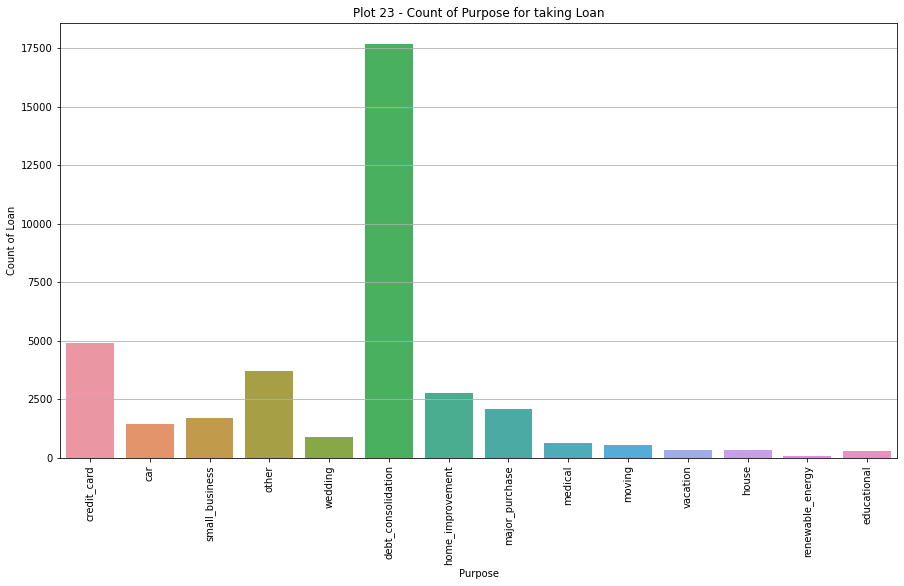

In [59]:
# Plot 23 - Shows count of 'Purpose' for taking loan

plt.figure(figsize=(15,8))
sns.countplot(df['purpose'])
plt.title('Plot 23 - Count of Purpose for taking Loan')
plt.xlabel('Purpose')
plt.ylabel('Count of Loan')
plt.grid(axis='y')
plt.xticks(rotation=90)

- ### Top 5 purposes of taking a loan : 
### Credit Card, Other, Debt Consolation, Home Improvement, Major Purchase

In [60]:
# Top 5 purposes for taking loan

top_5_purpose = ['credit_card','other','debt_consolidation','home_improvement','major_purchase']
df = df[df['purpose'].isin(top_5_purpose)]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'other'),
  Text(2, 0, 'debt_consolidation'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'major_purchase')])

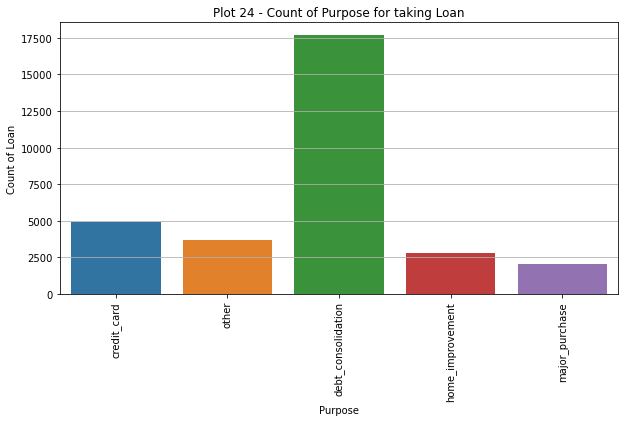

In [61]:
# Plot 24 - Shows count of 'Purpose' for taking loan

plt.figure(figsize=(10,5))
sns.countplot(df['purpose'])
plt.title('Plot 24 - Count of Purpose for taking Loan')
plt.xlabel('Purpose')
plt.ylabel('Count of Loan')
plt.grid(axis='y')
plt.xticks(rotation=90)

In [62]:
# Define a function similar to function 'plot_status' which takes in a categorical variable 
# and plot the average default rate across the categories

def plot_sgmnt_status(cat_col):
    return sns.barplot(data=df, x=cat_col, y='loan_status', hue='purpose')

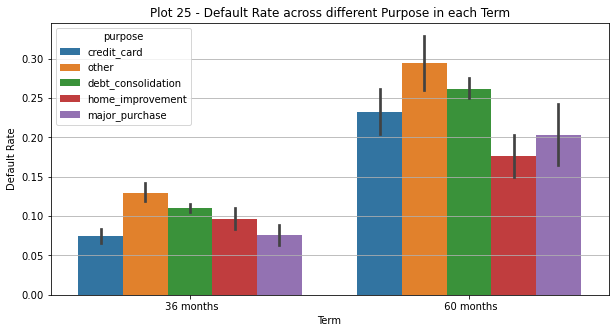

In [63]:
# Plot 25 - Shows Default Rate across different 'Purpose' in each 'Term'

plt.figure(figsize=(10,5))
plot_sgmnt_status('term')
plt.title('Plot 25 - Default Rate across different Purpose in each Term')
plt.xlabel('Term')
plt.ylabel('Default Rate')
plt.grid(axis='y')

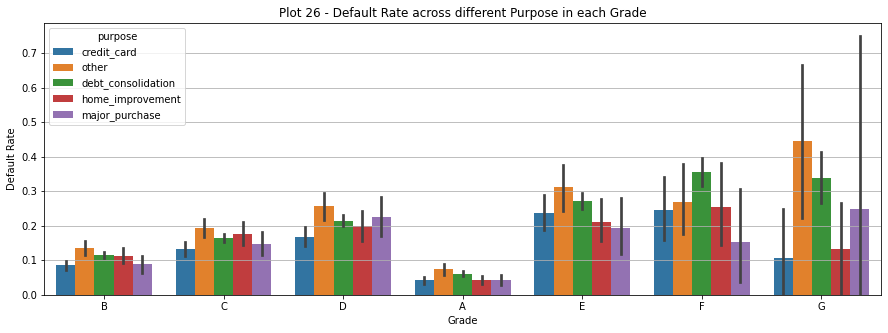

In [64]:
# Plot 26 - Shows Default Rate across different 'Purpose' in each 'Grade'

plt.figure(figsize=(15,5))
plot_sgmnt_status('grade')
plt.title('Plot 26 - Default Rate across different Purpose in each Grade')
plt.xlabel('Grade')
plt.ylabel('Default Rate')
plt.grid(axis='y')

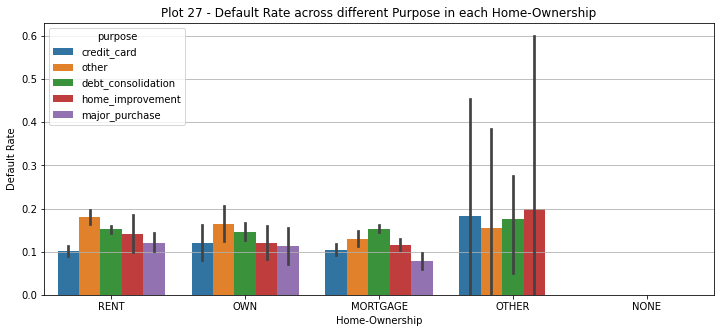

In [65]:
# Plot 27 - Shows Default Rate across different 'Purpose' in each 'Home-Ownershio'

plt.figure(figsize=(12,5))
plot_sgmnt_status('home_ownership')
plt.title('Plot 27 - Default Rate across different Purpose in each Home-Ownership')
plt.xlabel('Home-Ownership')
plt.ylabel('Default Rate')
plt.grid(axis='y')

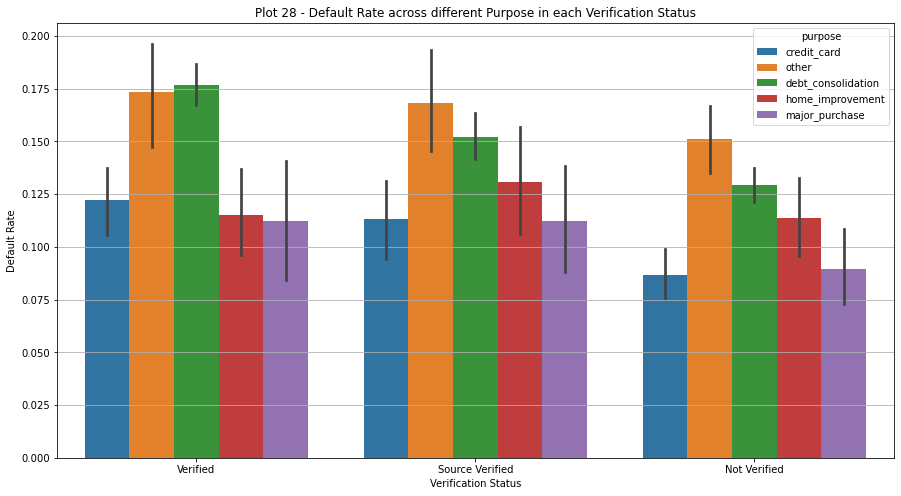

In [66]:
# Plot 28 - Shows Default Rate across different 'Purpose' in each 'Verification Status'

plt.figure(figsize=(15,8))
plot_sgmnt_status('verification_status')
plt.title('Plot 28 - Default Rate across different Purpose in each Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Default Rate')
plt.grid(axis='y')

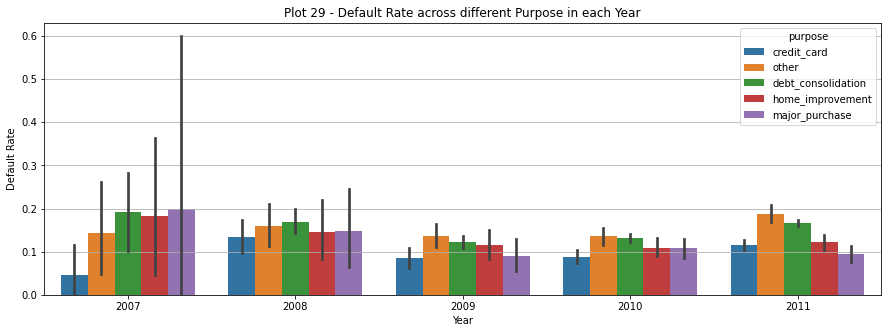

In [67]:
# Plot 29 - Shows Default Rate across different 'Purpose' in each 'Year'

plt.figure(figsize=(15,5))
plot_sgmnt_status(df['issue_d'].dt.year)
plt.title('Plot 29 - Default Rate across different Purpose in each Year')
plt.xlabel('Year')
plt.ylabel('Default Rate')
plt.grid(axis='y')

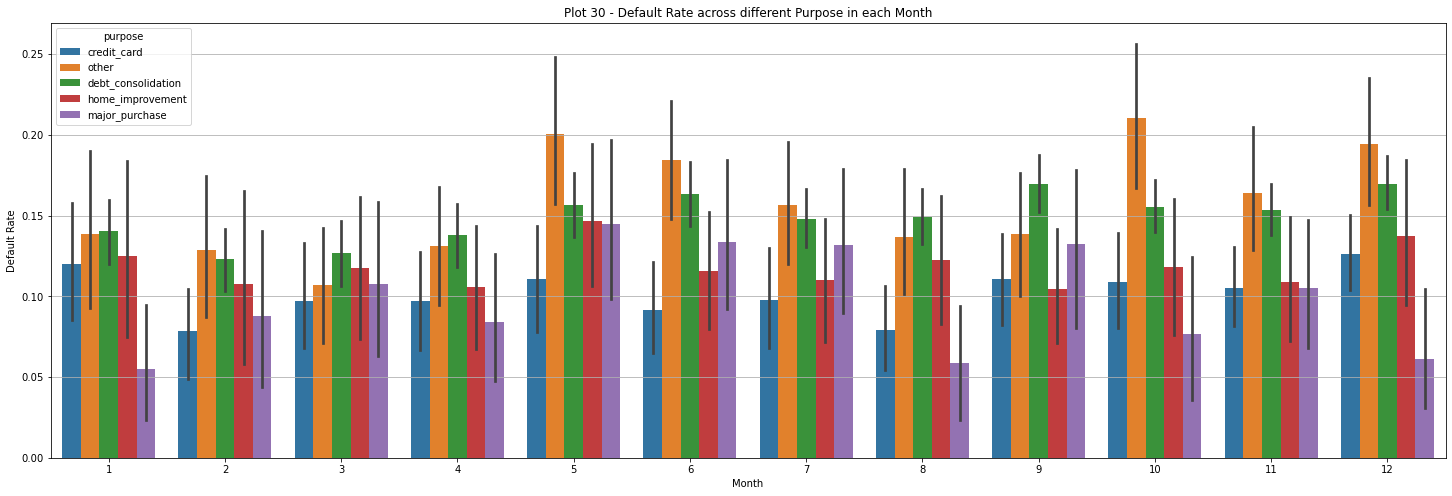

In [68]:
# Plot 30 - Shows Default Rate across different 'Purpose' in each 'Month'

plt.figure(figsize=(25,8))
plot_sgmnt_status(df['issue_d'].dt.month)
plt.title('Plot 30 - Default Rate across different Purpose in each Month')
plt.xlabel('Month')
plt.ylabel('Default Rate')
plt.grid(axis='y')

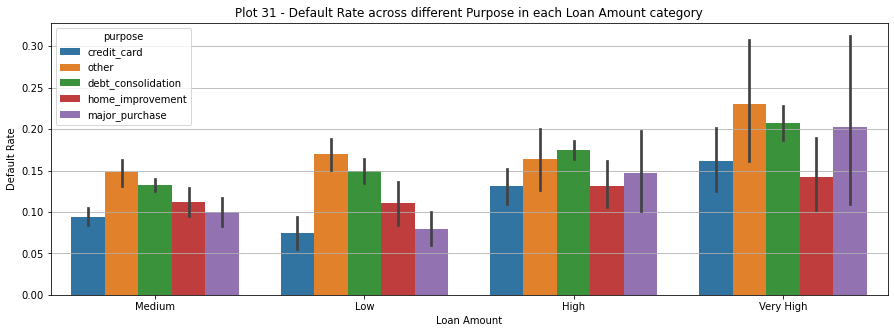

In [69]:
# Plot 31 - Shows Default Rate across different 'Purpose' in each 'Loan Amount' category

plt.figure(figsize=(15,5))
plot_sgmnt_status('loan_amnt')
plt.title('Plot 31 - Default Rate across different Purpose in each Loan Amount category')
plt.xlabel('Loan Amount')
plt.ylabel('Default Rate')
plt.grid(axis='y')

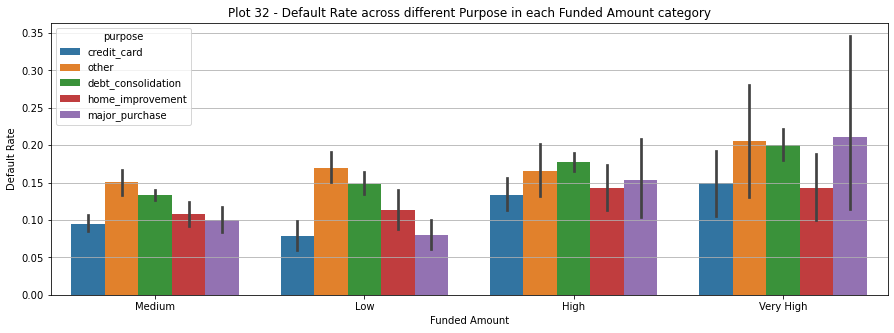

In [70]:
# Plot 32 - Shows Default Rate across different 'Purpose' in each 'Funded Amount' category

plt.figure(figsize=(15,5))
plot_sgmnt_status('funded_amnt')
plt.title('Plot 32 - Default Rate across different Purpose in each Funded Amount category')
plt.xlabel('Funded Amount')
plt.ylabel('Default Rate')
plt.grid(axis='y')

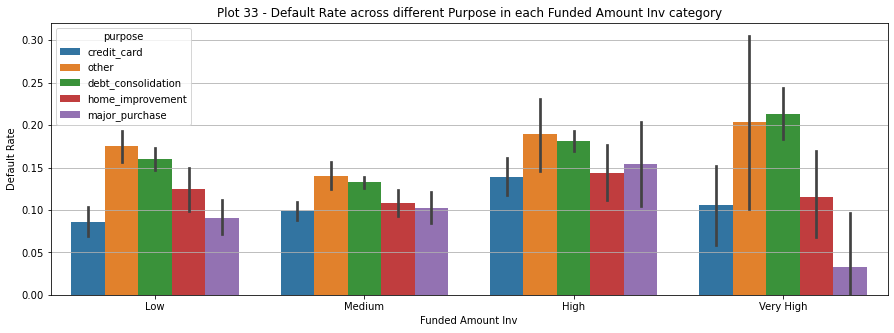

In [71]:
# Plot 33 - Shows Default Rate across different 'Purpose' in each 'Funded Amount Inv' category

plt.figure(figsize=(15,5))
plot_sgmnt_status('funded_amnt_inv')
plt.title('Plot 33 - Default Rate across different Purpose in each Funded Amount Inv category')
plt.xlabel('Funded Amount Inv')
plt.ylabel('Default Rate')
plt.grid(axis='y')

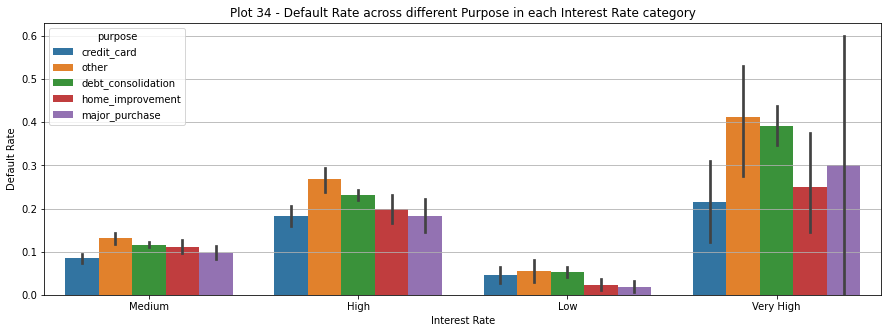

In [72]:
# Plot 34 - Shows Default Rate across different 'Purpose' in each 'Interest Rate' category

plt.figure(figsize=(15,5))
plot_sgmnt_status('int_rate')
plt.title('Plot 34 - Default Rate across different Purpose in each Interest Rate category')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate')
plt.grid(axis='y')

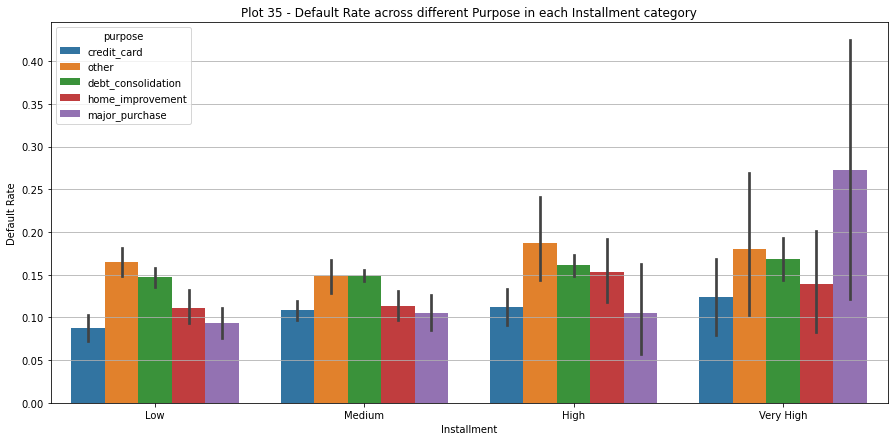

In [73]:
# Plot 35 - Shows Default Rate across different 'Purpose' in each 'Installment' category

plt.figure(figsize=(15,7))
plot_sgmnt_status('installment')
plt.title('Plot 35 - Default Rate across different Purpose in each Installment category')
plt.xlabel('Installment')
plt.ylabel('Default Rate')
plt.grid(axis='y')

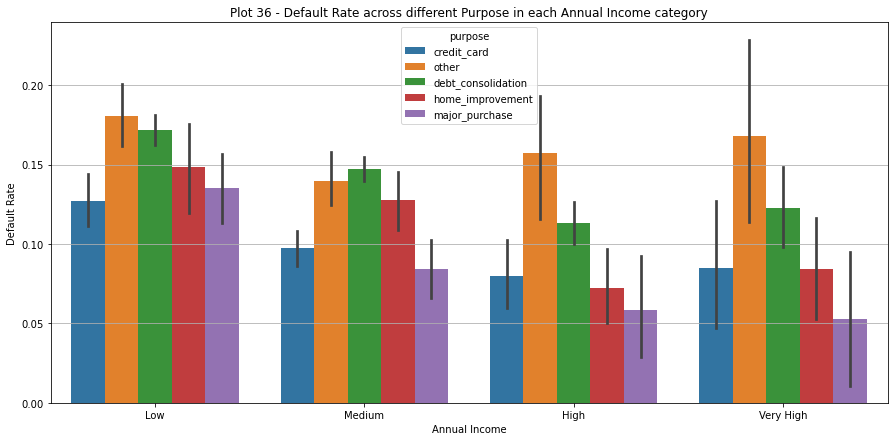

In [74]:
# Plot 36 - Shows Default Rate across different 'Purpose' in each 'Annual Income' category

plt.figure(figsize=(15,7))
plot_sgmnt_status('annual_inc')
plt.title('Plot 36 - Default Rate across different Purpose in each Annual Income category')
plt.xlabel('Annual Income')
plt.ylabel('Default Rate')
plt.grid(axis='y')

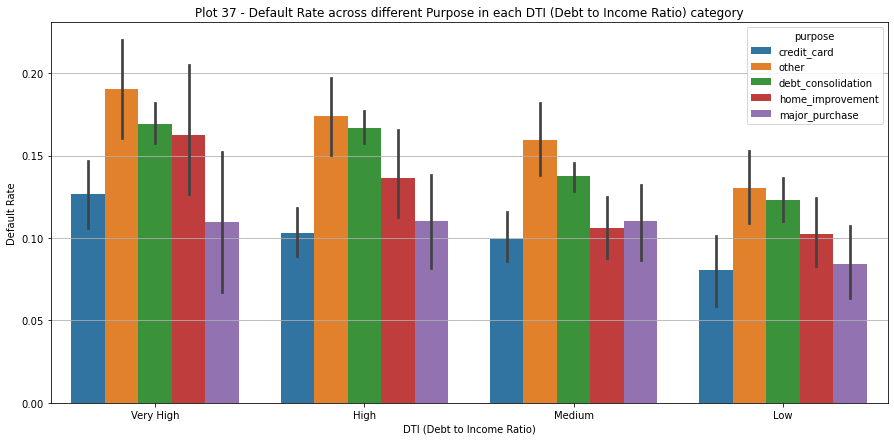

In [75]:
# Plot 37 - Shows Default Rate across different 'Purpose' in each 'DTI'(Debt to Income Ratio) category

plt.figure(figsize=(15,7))
plot_sgmnt_status('dti')
plt.title('Plot 37 - Default Rate across different Purpose in each DTI (Debt to Income Ratio) category')
plt.xlabel('DTI (Debt to Income Ratio)')
plt.ylabel('Default Rate')
plt.grid(axis='y')

- ### Write a function which takes in a categorical variable and computed the average default rate across the categories
- ### It can also compute the 'difference between the highest and the lowest default rate' across the  categories, which is a decent metric, indicating the effect of the varaible on default rate.


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31152 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          31152 non-null  int64         
 1   member_id                   31152 non-null  int64         
 2   loan_amnt                   31152 non-null  object        
 3   funded_amnt                 31152 non-null  object        
 4   funded_amnt_inv             31152 non-null  object        
 5   term                        31152 non-null  object        
 6   int_rate                    31152 non-null  object        
 7   installment                 31152 non-null  object        
 8   grade                       31152 non-null  object        
 9   sub_grade                   31152 non-null  object        
 10  emp_title                   30198 non-null  object        
 11  emp_length                  31152 non-null  object    

In [77]:
# Define a function that takes catogorical column as input and return the 'Default Rate' 
# and difference of max and min 'Default Rate'

def default_rate_diff(cat_col):
    difference = df.groupby(cat_col)['loan_status'].mean().sort_values().round(decimals=2)*100
    print(difference)
    print(difference[-1] - difference[0])

In [78]:
# 'Default Rate' and difference between max and min rate across 'Loan Amount'

default_rate_diff('loan_amnt')

loan_amnt
Medium       12.0
Low          13.0
High         16.0
Very High    19.0
Name: loan_status, dtype: float64
7.0


In [79]:
# 'Default Rate' and difference between max and min rate across 'Funded Amount'

default_rate_diff('funded_amnt')

funded_amnt
Medium       12.0
Low          13.0
High         17.0
Very High    19.0
Name: loan_status, dtype: float64
7.0


In [80]:
# 'Default Rate' and difference between max and min rate across 'Funded Amount Inv'

default_rate_diff('funded_amnt_inv')

funded_amnt_inv
Medium       12.0
Low          14.0
High         17.0
Very High    18.0
Name: loan_status, dtype: float64
6.0


In [81]:
# 'Default Rate' and difference between max and min rate across 'Term'

default_rate_diff('term')

term
 36 months    10.0
 60 months    25.0
Name: loan_status, dtype: float64
15.0


In [82]:
# 'Default Rate' and difference between max and min rate across 'Interest Rate'

default_rate_diff('int_rate')

int_rate
Low           4.0
Medium       11.0
High         22.0
Very High    36.0
Name: loan_status, dtype: float64
32.0


In [83]:
# 'Default Rate' and difference between max and min rate across 'Installment'

default_rate_diff('installment')

installment
Low          13.0
Medium       14.0
High         15.0
Very High    16.0
Name: loan_status, dtype: float64
3.0


In [84]:
# 'Default Rate' and difference between max and min rate across 'Grade'

default_rate_diff('grade')

grade
A     6.0
B    11.0
C    16.0
D    21.0
E    26.0
G    30.0
F    32.0
Name: loan_status, dtype: float64
26.0


In [85]:
# 'Default Rate' and difference between max and min rate across 'Sub-Grade'

default_rate_diff('sub_grade')

sub_grade
A1     2.0
A2     5.0
A3     5.0
A4     6.0
A5     7.0
B1     8.0
B2     9.0
B3    11.0
B4    12.0
B5    13.0
C2    15.0
C1    15.0
G4    16.0
C5    17.0
C4    17.0
D1    17.0
C3    18.0
D2    21.0
D3    22.0
E3    22.0
D4    23.0
D5    24.0
G5    26.0
E1    27.0
E2    27.0
E4    28.0
F1    28.0
F2    28.0
E5    28.0
F3    30.0
G1    31.0
G2    33.0
F4    37.0
G3    44.0
F5    48.0
Name: loan_status, dtype: float64
46.0


In [86]:
# 'Default Rate' and difference between max and min rate across 'Employement Length'

default_rate_diff('emp_length')

emp_length
2     13.0
4     13.0
9     13.0
8     13.0
3     13.0
1     14.0
5     14.0
6     14.0
7     15.0
10    15.0
Name: loan_status, dtype: float64
2.0


In [87]:
# 'Default Rate' and difference between max and min rate across 'Employee Title'

default_rate_diff('emp_title')

emp_title
  old palm inc                        0.0
RR Bowker LLC                         0.0
RQ Construction, LLC                  0.0
RQ Construction                       0.0
RPS Dining Service                    0.0
                                    ...  
Old Dominion Freight Lines, Inc.    100.0
Old Dominion Freight Lines Inc.     100.0
CSV, Inc.                           100.0
Hayes Concrete Construction         100.0
zozaya officiating                  100.0
Name: loan_status, Length: 23697, dtype: float64
100.0


In [88]:
# 'Default Rate' and difference between max and min rate across 'Home-Ownership'

default_rate_diff('home_ownership')

home_ownership
NONE         0.0
MORTGAGE    13.0
OWN         14.0
RENT        14.0
OTHER       16.0
Name: loan_status, dtype: float64
16.0


In [89]:
# 'Default Rate' and difference between max and min rate across 'Annual Income'

default_rate_diff('annual_inc')

annual_inc
High         10.0
Very High    11.0
Medium       13.0
Low          16.0
Name: loan_status, dtype: float64
6.0


In [90]:
# 'Default Rate' and difference between max and min rate across 'Verification Status'

default_rate_diff('verification_status')

verification_status
Not Verified       12.0
Source Verified    14.0
Verified           16.0
Name: loan_status, dtype: float64
4.0


In [91]:
# 'Default Rate' and difference between max and min rate across 'Purpose'

default_rate_diff('purpose')

purpose
major_purchase        10.0
credit_card           10.0
home_improvement      12.0
debt_consolidation    15.0
other                 16.0
Name: loan_status, dtype: float64
6.0


In [92]:
# 'Default Rate' and difference between max and min rate across 'DTI' (Debt to Income Ratio)

default_rate_diff('dti')

dti
Low          11.0
Medium       13.0
High         15.0
Very High    16.0
Name: loan_status, dtype: float64
5.0
